In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util
from tf_unet import image_util

In [3]:
nx = 640
ny = 360

In [4]:
generator = image_util.ImageDataProvider(search_path='training_data/*.tiff')

Number of files used: 9


In [5]:
x_test, y_test = generator(9)

In [6]:
np.sum(y_test)

1997949.0

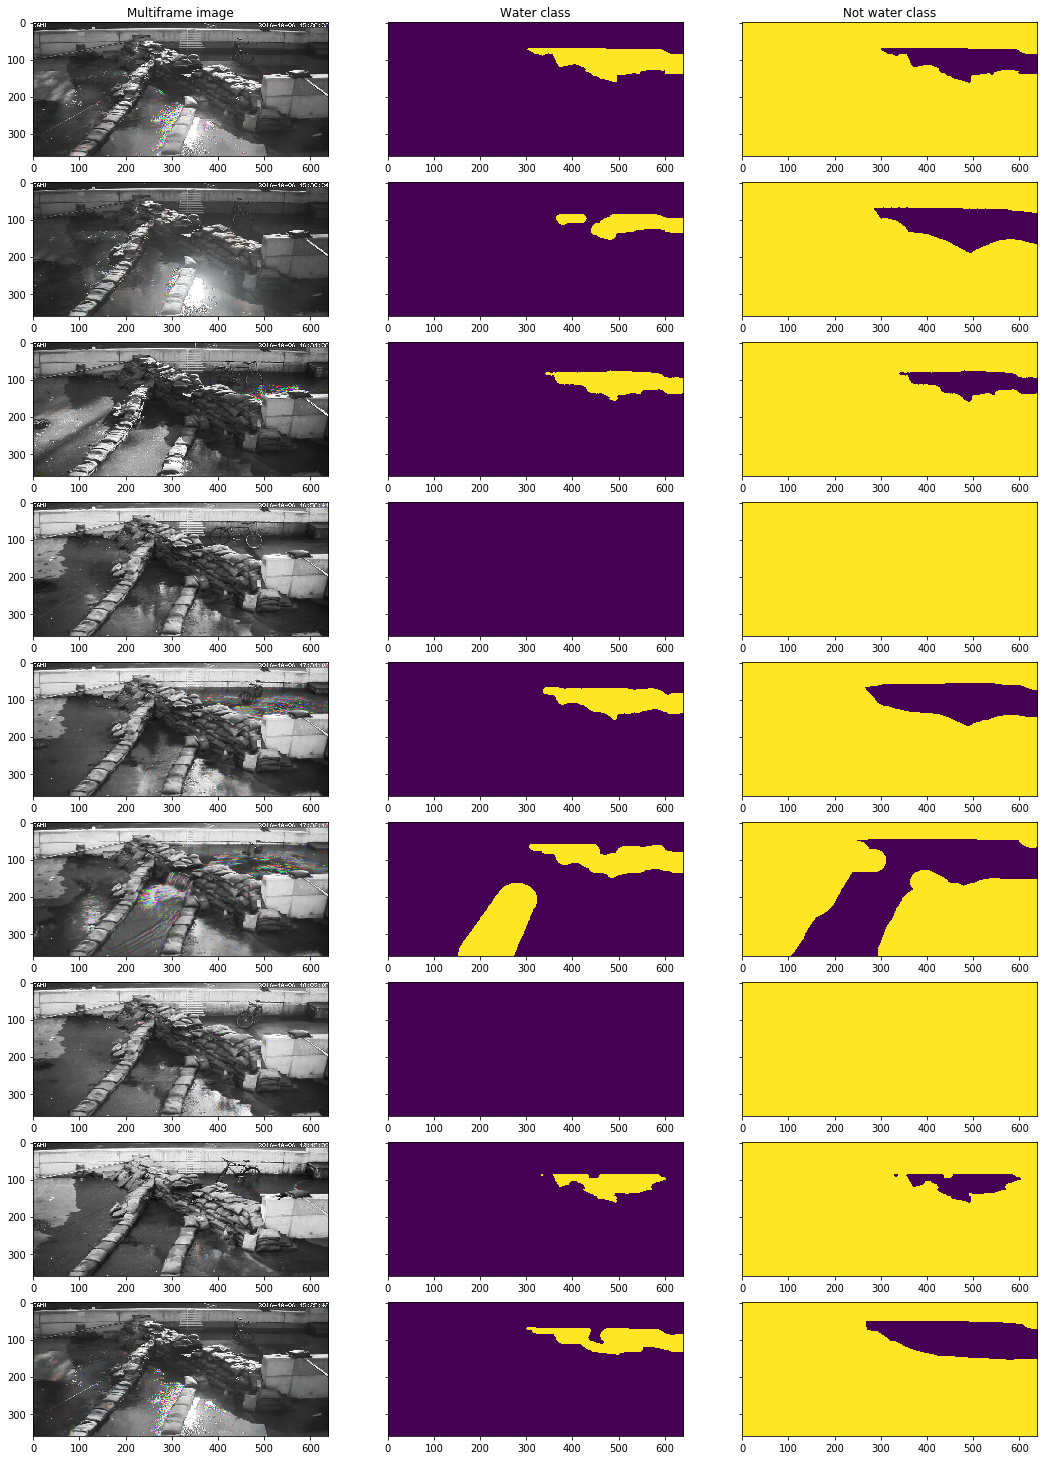

In [7]:
fig, ax = plt.subplots(9,3, sharey=True, figsize=(18,26))
ax[0,0].set_title('Multiframe image')
ax[0,1].set_title('Water class')
ax[0,2].set_title('Not water class')
for i in range(0,9):
    ax[i,0].imshow(x_test[i,...], aspect="auto")
    ax[i,1].imshow(y_test[i,...,0], aspect="auto")
    ax[i,2].imshow(y_test[i,...,1], aspect="auto")

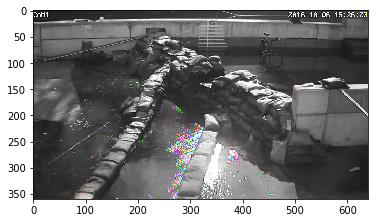

In [8]:
plt.imshow(x_test[0,...])

In [13]:
net = unet.Unet(channels=3, n_class=2, layers=4, features_root=16, cost_kwargs=dict(class_weights=[10,1]))

2017-08-03 10:08:00,819 Layers 4, features 16, filter size 3x3, pool size: 2x2


In [14]:
trainer = unet.Trainer(net, optimizer="adam")

In [15]:
path = trainer.train(generator, "./unet_trained", training_iters=50, epochs=40, display_step=25, restore=False, write_graph=True)

2017-08-03 10:08:03,904 Removing 'Q:\Abteilungsprojekte\eng\SWWData\Matthew\Workspace\watsen_unet\demo\water_level\prediction'
2017-08-03 10:08:03,944 Removing 'Q:\Abteilungsprojekte\eng\SWWData\Matthew\Workspace\watsen_unet\demo\water_level\unet_trained'
2017-08-03 10:08:04,007 Allocating 'Q:\Abteilungsprojekte\eng\SWWData\Matthew\Workspace\watsen_unet\demo\water_level\prediction'
2017-08-03 10:08:06,523 Verification error= 45.5%, loss= 1.0289
2017-08-03 10:08:10,083 Start optimization
2017-08-03 10:08:10,694 Iter 0, Minibatch Loss= 1.8249, Training Accuracy= 0.2534, Minibatch error= 61.2%
2017-08-03 10:08:14,898 Iter 25, Minibatch Loss= 0.6661, Training Accuracy= 1.0000, Minibatch error= 0.0%
2017-08-03 10:08:18,430 Epoch 0, Average loss: 1.1559, learning rate: 0.0010
2017-08-03 10:08:18,545 Verification error= 10.4%, loss= 1.0119
2017-08-03 10:08:22,313 Iter 50, Minibatch Loss= 0.9715, Training Accuracy= 0.9351, Minibatch error= 15.7%
2017-08-03 10:08:26,469 Iter 75, Minibatch Loss=

2017-08-03 10:15:51,628 Epoch 21, Average loss: 0.6265, learning rate: 0.0010
2017-08-03 10:15:51,748 Verification error= 12.2%, loss= 0.3692
2017-08-03 10:16:02,978 Iter 1100, Minibatch Loss= 0.3711, Training Accuracy= 0.9410, Minibatch error= 5.9%
2017-08-03 10:16:14,017 Iter 1125, Minibatch Loss= 1.2526, Training Accuracy= 0.8911, Minibatch error= 23.5%
2017-08-03 10:16:23,839 Epoch 22, Average loss: 0.3704, learning rate: 0.0010
2017-08-03 10:16:23,955 Verification error= 6.3%, loss= 0.1372
2017-08-03 10:16:35,536 Iter 1150, Minibatch Loss= 0.1226, Training Accuracy= 0.9576, Minibatch error= 4.2%
2017-08-03 10:16:47,002 Iter 1175, Minibatch Loss= 0.1538, Training Accuracy= 0.9912, Minibatch error= 7.0%
2017-08-03 10:16:57,172 Epoch 23, Average loss: 0.2732, learning rate: 0.0010
2017-08-03 10:16:57,292 Verification error= 5.3%, loss= 0.1658
2017-08-03 10:17:09,256 Iter 1200, Minibatch Loss= 0.1511, Training Accuracy= 0.9647, Minibatch error= 8.7%
2017-08-03 10:17:21,243 Iter 1225, 

In [16]:
x_test, y_test = generator(9)

prediction = net.predict("./unet_trained/model.cpkt", x_test)

INFO:tensorflow:Restoring parameters from ./unet_trained/model.cpkt


2017-08-03 10:28:26,136 Restoring parameters from ./unet_trained/model.cpkt
2017-08-03 10:28:27,601 Model restored from file: ./unet_trained/model.cpkt


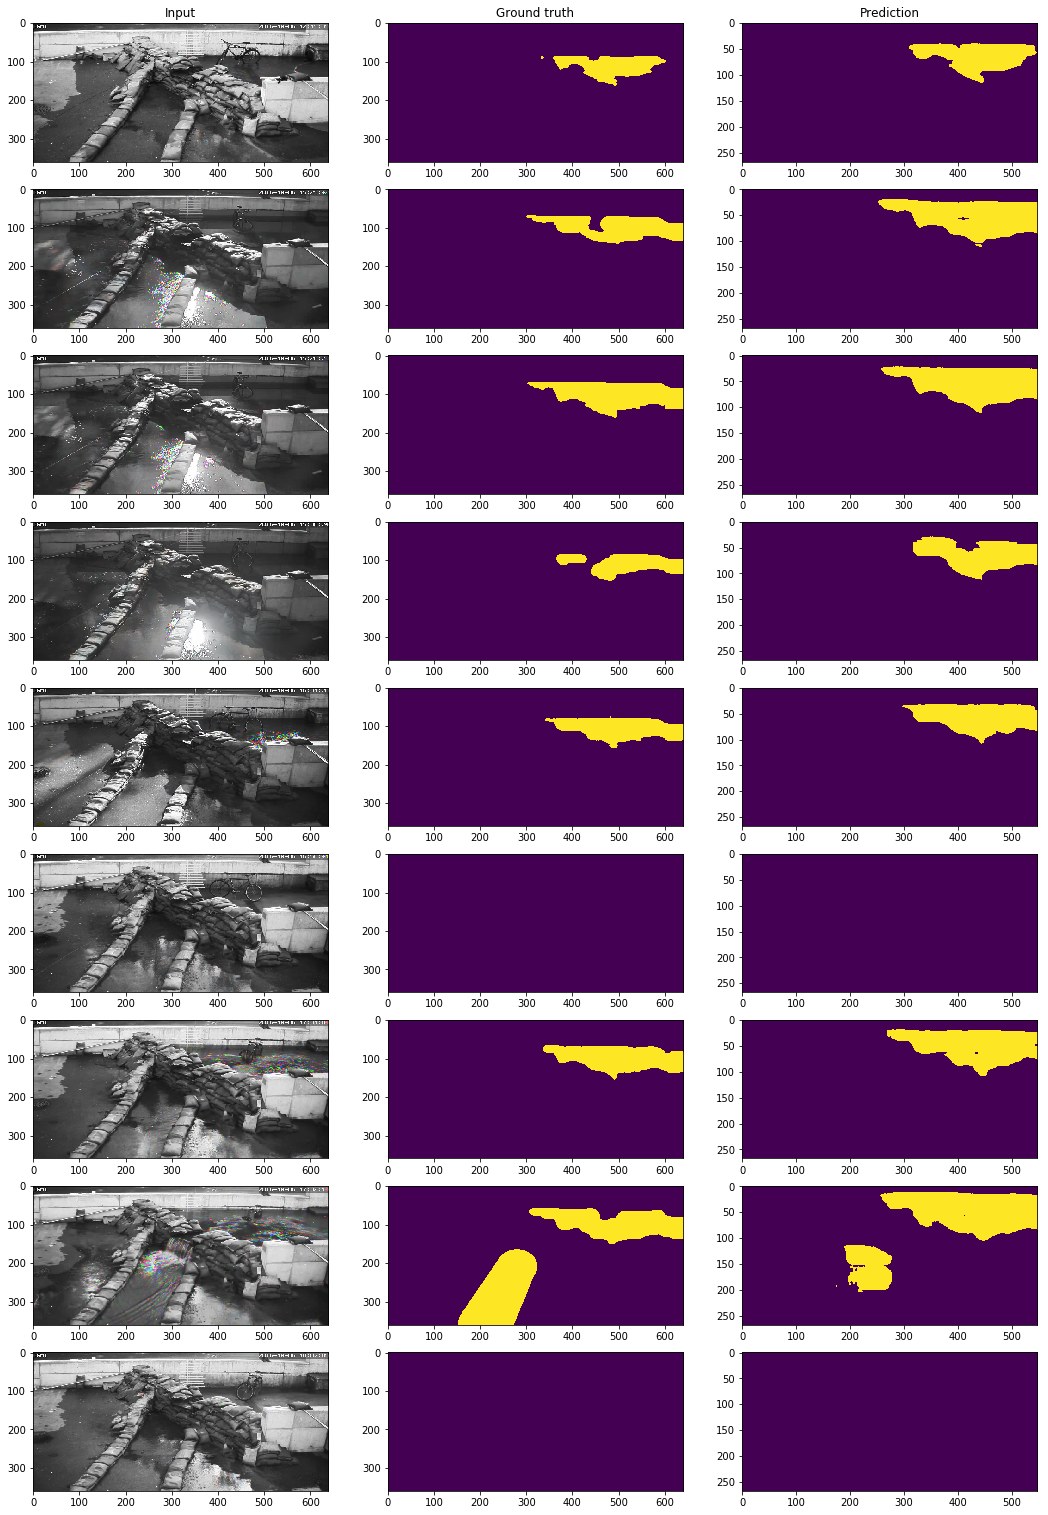

In [17]:
fig, ax = plt.subplots(9, 3, sharex=False, sharey=False, figsize=(18,27))
for i in range(0,9):
    ax[i, 0].imshow(x_test[i,...], aspect="auto")
    ax[i, 1].imshow(y_test[i,...,0], aspect="auto")
    mask = prediction[i,...,0]>0.9
    ax[i, 2].imshow(mask, aspect="auto")
ax[0,0].set_title("Input")
ax[0,1].set_title("Ground truth")
ax[0,2].set_title("Prediction")